
## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
# File location and type
#file_location = "/FileStore/tables/Walmart_Sales-1.csv"
#file_type = "csv"
from pyspark.sql.functions import to_date, year
from pyspark.sql.functions import to_date, col, sum

sales_data = spark.read.csv("/FileStore/tables/Walmart_Sales-1.csv", header=True, inferSchema=True)



display(sales_data)

Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,2010-02-05,1643690.9,0,42.31,2.572,211.0963582,8.106
1,2010-02-12,1641957.44,1,38.51,2.548,211.2421698,8.106
1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106
1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106
1,2010-03-05,1554806.68,0,46.5,2.625,211.3501429,8.106
1,2010-03-12,1439541.59,0,57.79,2.667,211.3806429,8.106
1,2010-03-19,1472515.79,0,54.58,2.72,211.215635,8.106
1,2010-03-26,1404429.92,0,51.45,2.732,211.0180424,8.106
1,2010-04-02,1594968.28,0,62.27,2.719,210.8204499,7.808
1,2010-04-09,1545418.53,0,65.86,2.77,210.6228574,7.808


In [0]:
# Assuming your date column is in 'dd-mm-yyyy' format, convert it to date type
sales_data = sales_data.withColumn("date", to_date(sales_data["Date"], "dd-MM-yyyy"))

# Extract year from date column
sales_data = sales_data.withColumn("year", year("date"))
sales_data.show()


+-----+----------+------------+------------+-----------+----------+-----------+------------+----+
|Store|      date|Weekly_Sales|Holiday_Flag|Temperature|Fuel_Price|        CPI|Unemployment|year|
+-----+----------+------------+------------+-----------+----------+-----------+------------+----+
|    1|2010-02-05|   1643690.9|           0|      42.31|     2.572|211.0963582|       8.106|2010|
|    1|2010-02-12|  1641957.44|           1|      38.51|     2.548|211.2421698|       8.106|2010|
|    1|2010-02-19|  1611968.17|           0|      39.93|     2.514|211.2891429|       8.106|2010|
|    1|2010-02-26|  1409727.59|           0|      46.63|     2.561|211.3196429|       8.106|2010|
|    1|2010-03-05|  1554806.68|           0|       46.5|     2.625|211.3501429|       8.106|2010|
|    1|2010-03-12|  1439541.59|           0|      57.79|     2.667|211.3806429|       8.106|2010|
|    1|2010-03-19|  1472515.79|           0|      54.58|      2.72| 211.215635|       8.106|2010|
|    1|2010-03-26|  

In [0]:
sales_data_2010 = sales_data.filter(sales_data['year'] == 2010)
sales_data_2011 = sales_data.filter(sales_data['year'] == 2011)
sales_data_2012 = sales_data.filter(sales_data['year'] == 2012)
display(sales_data_2010)

Store,date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year
1,2010-02-05,1643690.9,0,42.31,2.572,211.0963582,8.106,2010
1,2010-02-12,1641957.44,1,38.51,2.548,211.2421698,8.106,2010
1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106,2010
1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106,2010
1,2010-03-05,1554806.68,0,46.5,2.625,211.3501429,8.106,2010
1,2010-03-12,1439541.59,0,57.79,2.667,211.3806429,8.106,2010
1,2010-03-19,1472515.79,0,54.58,2.72,211.215635,8.106,2010
1,2010-03-26,1404429.92,0,51.45,2.732,211.0180424,8.106,2010
1,2010-04-02,1594968.28,0,62.27,2.719,210.8204499,7.808,2010
1,2010-04-09,1545418.53,0,65.86,2.77,210.6228574,7.808,2010


In [0]:
display(sales_data_2011)

Store,date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year
1,2011-01-07,1444732.28,0,48.27,2.976,211.4047419,7.742,2011
1,2011-01-14,1391013.96,0,35.4,2.983,211.4574109,7.742,2011
1,2011-01-21,1327405.42,0,44.04,3.016,211.8272343,7.742,2011
1,2011-01-28,1316899.31,0,43.83,3.01,212.1970577,7.742,2011
1,2011-02-04,1606629.58,0,42.27,2.989,212.5668812,7.742,2011
1,2011-02-11,1649614.93,1,36.39,3.022,212.9367046,7.742,2011
1,2011-02-18,1686842.78,0,57.36,3.045,213.2478853,7.742,2011
1,2011-02-25,1456800.28,0,62.9,3.065,213.535609,7.742,2011
1,2011-03-04,1636263.41,0,59.58,3.288,213.8233327,7.742,2011
1,2011-03-11,1553191.63,0,53.56,3.459,214.1110564,7.742,2011


In [0]:
# Ensure the 'weekly_sales' column is of numeric type
sales_data = sales_data.withColumn("weekly_sales", col("weekly_sales").cast("double"))

# Handle rows where 'weekly_sales' could not be converted to double
sales_data = sales_data.filter(col("weekly_sales").isNotNull())
# Aggregate total weekly sales by store
store_performance = sales_data.groupBy("Store").agg(sum("Weekly_Sales").alias("total_sales"))
store_performance.show()




+-----+--------------------+
|Store|         total_sales|
+-----+--------------------+
|   31|1.9961390549999997E8|
|   34|1.3824976300000003E8|
|   28|1.8926368057999986E8|
|   26|1.4341639379000008E8|
|   27|2.5385591688000003E8|
|   44| 4.329308783999999E7|
|   12|1.4428723014999998E8|
|   22|1.4707564857000002E8|
|    1|2.2240280885000005E8|
|   13|2.8651770380000013E8|
|    6|2.2375613064000002E8|
|   16| 7.425242540000002E7|
|    3|       5.758673507E7|
|   20|3.0139779246000004E8|
|   40|1.3787030979000008E8|
|    5|        4.54756889E7|
|   19|       2.066348621E8|
|   41|1.8134193488999993E8|
|   15| 8.913368391999997E7|
|   43| 9.056543541000003E7|
+-----+--------------------+
only showing top 20 rows



In [0]:
from pyspark.sql.functions import avg

# Aggregate average weekly sales during holidays and non-holidays
holiday_sales = sales_data.groupBy("Holiday_Flag").agg(avg("weekly_sales").alias("average_sales"))

# Display the result
holiday_sales.show()


+------------+------------------+
|Holiday_Flag|     average_sales|
+------------+------------------+
|           1|1122887.8923555554|
|           0|1041256.3802088564|
+------------+------------------+



In [0]:
from pyspark.sql.functions import corr

# Calculate the correlation between weekly sales and other factors
cpi_correlation = sales_data.select(corr("weekly_sales", "cpi")).alias("correlation_with_cpi")
temperature_correlation = sales_data.select(corr("weekly_sales", "Temperature")).alias("correlation_with_temperature")
fuel_price_correlation = sales_data.select(corr("weekly_sales", "fuel_price")).alias("correlation_with_fuel_price")
unemployment_correlation = sales_data.select(corr("weekly_sales", "unemployment")).alias("correlation_with_unemployment")

# Display the results
cpi_correlation.show()
temperature_correlation.show()
fuel_price_correlation.show()
unemployment_correlation.show()


+-----------------------+
|corr(weekly_sales, cpi)|
+-----------------------+
|   -0.07263416204017413|
+-----------------------+

+-------------------------------+
|corr(weekly_sales, Temperature)|
+-------------------------------+
|           -0.06381001317946852|
+-------------------------------+

+------------------------------+
|corr(weekly_sales, fuel_price)|
+------------------------------+
|          0.009463786314475465|
+------------------------------+

+--------------------------------+
|corr(weekly_sales, unemployment)|
+--------------------------------+
|            -0.10617608965795235|
+--------------------------------+



In [0]:
# Correlation matrix

from pyspark.sql import DataFrameStatFunctions as statFunc
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
# Selecting only the numeric columns for correlation matrix
# Selecting only the numeric columns for correlation matrix
numeric_cols = ["weekly_sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features")
sales_data_assembled = assembler.transform(sales_data).select("features")

# Calculate the correlation matrix
corr_matrix = Correlation.corr(sales_data_assembled, "features").head()

# Extracting the correlation matrix
matrix = corr_matrix[0].toArray()

# Display the correlation matrix
print("Correlation Matrix:")
print(matrix)


Correlation Matrix:
[[ 1.         -0.06381001  0.00946379 -0.07263416 -0.10617609]
 [-0.06381001  1.          0.14498181  0.17688768  0.10115786]
 [ 0.00946379  0.14498181  1.         -0.1706418  -0.03468374]
 [-0.07263416  0.17688768 -0.1706418   1.         -0.30202006]
 [-0.10617609  0.10115786 -0.03468374 -0.30202006  1.        ]]


In [0]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

# Prepare data for modeling
feature_columns = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
model_data = assembler.transform(sales_data).select("features", "weekly_sales")

# Split the data into training and test sets
train_data, test_data = model_data.randomSplit([0.7, 0.3], seed=1234)

# Build and train the linear regression model
lr = LinearRegression(labelCol="weekly_sales")
lr_model = lr.fit(train_data)

# Evaluate the model on test data
test_results = lr_model.evaluate(test_data)

# Print out the model summary
print(f"RMSE: {test_results.rootMeanSquaredError}")
print(f"R2: {test_results.r2}")


RMSE: 558010.4409727383
R2: 0.025792068661202094


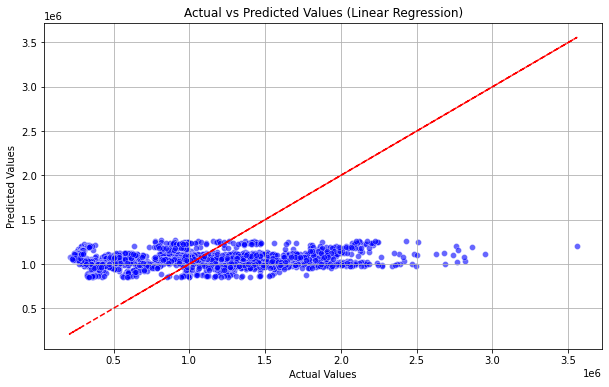

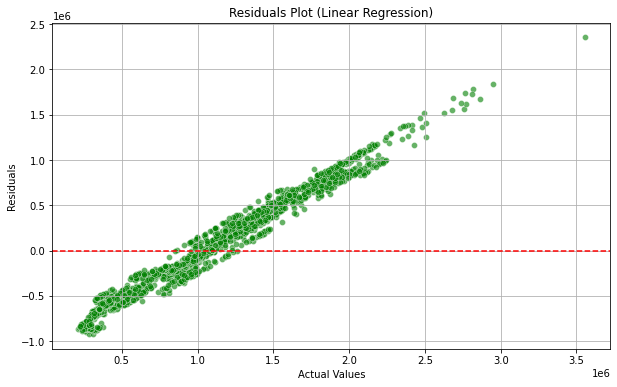

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert Spark DataFrame to Pandas DataFrame for plotting
predictions = lr_model.transform(test_data).select("weekly_sales", "prediction").toPandas()

# Extract actual and predicted values
actual = predictions["weekly_sales"]
predicted = predictions["prediction"]

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=actual, y=predicted, color='blue', alpha=0.6)
plt.plot(actual, actual, color='red', linestyle='--')

plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Residuals plot
residuals = predictions["weekly_sales"] - predictions["prediction"]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=actual, y=residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')

plt.title('Residuals Plot (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


In [0]:
# Create a view or table

temp_table_name = "Walmart_Sales-1_csv"

df.createOrReplaceTempView(temp_table_name)

In [0]:
%sql

/* Query the created temp table in a SQL cell */

select * from `Walmart_Sales-1_csv`

In [0]:
# With this registered as a temp view, it will only be available to this particular notebook. If you'd like other users to be able to query this table, you can also create a table from the DataFrame.
# Once saved, this table will persist across cluster restarts as well as allow various users across different notebooks to query this data.
# To do so, choose your table name and uncomment the bottom line.

permanent_table_name = "Walmart_Sales-1_csv"

# df.write.format("parquet").saveAsTable(permanent_table_name)